In [34]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# np.random.seed(0)

### 1.
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?

Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)

Hiện tượng gì đang xảy ra?


In [35]:
x = np.random.rand(10) * 10 - 5
x

array([ 1.99479275, -2.02563049,  3.1379782 , -1.03494259,  3.81103197,
        0.81272873,  3.81735362,  1.9253159 ,  2.2525428 ,  0.01324382])

In [36]:
x = np.sort(x)
x

array([-2.02563049, -1.03494259,  0.01324382,  0.81272873,  1.9253159 ,
        1.99479275,  2.2525428 ,  3.1379782 ,  3.81103197,  3.81735362])

In [37]:
y = x**2 + np.random.normal(0,5)

In [38]:
x,y

(array([-2.02563049, -1.03494259,  0.01324382,  0.81272873,  1.9253159 ,
         1.99479275,  2.2525428 ,  3.1379782 ,  3.81103197,  3.81735362]),
 array([ 4.73773935,  1.70566663,  0.63473586,  1.29508845,  4.34140178,
         4.61375859,  5.70850952, 10.48146763, 15.15852515, 15.20674911]))

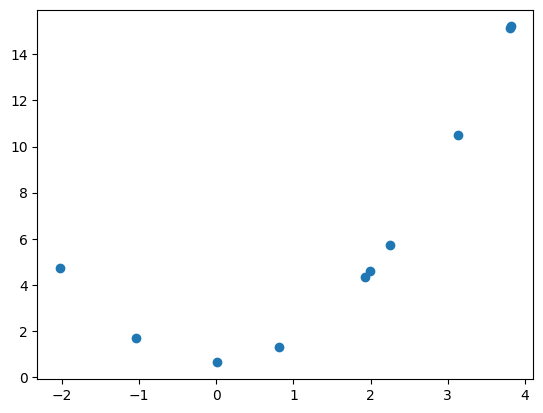

In [39]:
plt.scatter(x,y)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_regr = PolynomialFeatures(degree = 9)
X_poly = poly_regr.fit_transform(x.reshape(-1, 1)) # transforms the features to the polynomial form
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [41]:
y_hat = lin_reg.predict(poly_regr.fit_transform(x.reshape(-1, 1)))
print('MSE: ', np.mean((y - y_hat)**2))

MSE:  8.326338107755943e-27


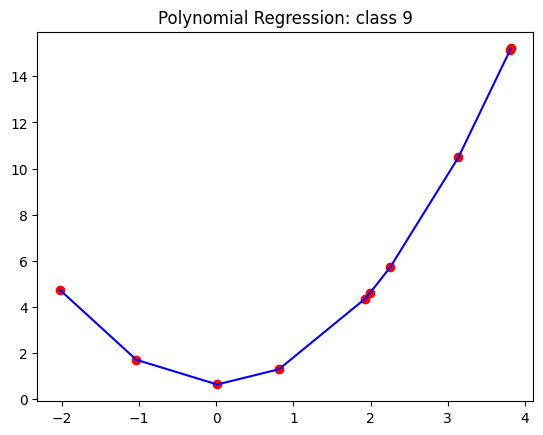

In [42]:
plt.scatter(x, y, color = 'red') # plotting the training set
plt.plot(x, y_hat, color = 'blue') # plotting the polynomial regression line
plt.title('Polynomial Regression: class 9')

plt.show()

In [43]:
# Add 100 points

x_2 = np.random.rand(100) * 10 - 5
y_2 = x_2**2 + np.random.normal(0,5)

In [44]:
d_2 = {'x': x_2, 'y': y_2}
df_100 = pd.DataFrame(d_2)

In [45]:
df = df_100.sort_values('x')

In [46]:
X_poly_2 = poly_regr.fit_transform(df[['x']])

lin_reg.fit(X_poly_2, df[['y']])

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error

y_hat_2 = lin_reg.predict(X_poly_2)
print('MSE: ')

mean_squared_error(df['y'], y_hat_2)

MSE: 


2.4534945276245997e-22

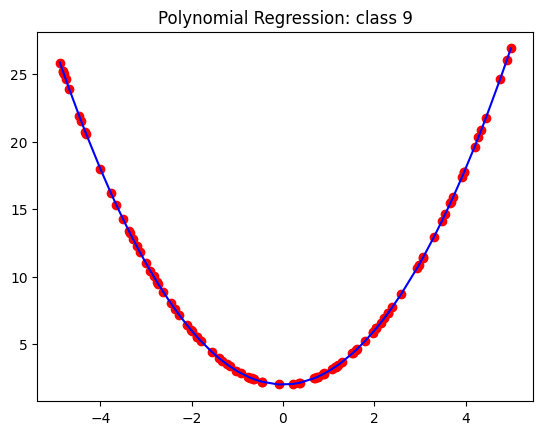

In [48]:
plt.scatter(df['x'], df['y'], color = 'red') # plotting the training set
plt.plot(df['x'], y_hat_2, color = 'blue') # plotting the polynomial regression line
plt.title('Polynomial Regression: class 9')

plt.show()

Nhận xét: Đường regression trở nên mượt hơn khi có thêm dữ liệu

### 2: Code from scratch
Implement hàm tính convolution \\
Input: X, W, stride, padding \\
Output: Y \\
Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch


In [66]:
def convolution(X, W, stride=1, padding=0):
    k = W.shape[0]
    Y_m = int((X.shape[0] - k + padding * 2) / stride + 1)
    Y_n = int((X.shape[1] - k + padding * 2) / stride + 1)

    Y = np.zeros(shape=(Y_m, Y_n))

    if padding != 0:
        X_with_padding = np.zeros(shape=(X.shape[0] + padding * 2
                                        , X.shape[1] + padding * 2))
        X_with_padding[padding:-padding, padding:-padding] = X
        X = X_with_padding

    for i in range(Y_m):
        for j in range(Y_n):
            mat = X[i:i+k*stride:stride, j:j+k*stride:stride]

            Y[i, j] = np.sum(np.multiply(mat, W))

    return Y

In [67]:
X = np.array([[1, 1, 1, 0, 0],
             [0, 1, 1, 1, 0],
             [0, 0, 1, 1, 1],
             [0, 0, 1, 1, 0],
             [0, 1, 1, 0, 0]])
W = np.array([[1, 0, 1],
             [0, 1, 0],
             [1, 0, 1]])

In [68]:
convolution(X, W, stride=1, padding=0)

array([[4., 3., 4.],
       [2., 4., 3.],
       [2., 3., 4.]])

In [70]:
convolution(X, W, stride=1, padding=1)

array([[2., 2., 3., 1., 1.],
       [1., 4., 3., 4., 1.],
       [1., 2., 4., 3., 3.],
       [1., 2., 3., 4., 1.],
       [0., 2., 2., 1., 1.]])

In [71]:
convolution(X, W, stride=2, padding=1)

array([[2., 1., 1.],
       [0., 2., 3.],
       [1., 1., 2.]])

In [73]:
# so sanh voi pytorch
from torch import nn
m = nn.Conv2d(5, 5, 3, stride=2, padding=1)
m(X)

TypeError: ignored